In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

from collections import Counter
from utils import *


In [42]:
def missed_alleles_per_ancestry(pre,gs):
    groupscsv = "../datasets/SraRunTableD2.txt"
    groups = pd.read_csv(groupscsv)
    
    results = []

    for group, df_by_group in groups.groupby('Population'):
        accession_numbers = df_by_group['Run'].values.tolist()
        gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
        gs_final = gs_final.iloc[: ,:]
        

        ret = get_inaccurate_alleles(pre,gs_final)
        results.append(ret)

    yorubaresult = results[4]
    europeanresult = sum_euro_groups(results[1:4])

    return yorubaresult, europeanresult

In [43]:
data = list()
tools=["hlaforest","optitype","phlat","seq2hla","rna2hla","arcas","hlavbseq","hlahd"]

yoruba_missed_alleles = []
europe_missed_alleles = []

for t in tools:
    gs=pd.read_csv("../datasets/2_gs.csv")
    pre=pd.read_csv("../results/standard/"+str(t)+"_d2.csv")
        
    results = missed_alleles_per_ancestry(pre,gs)
    
    for i in results[0]:
        yoruba_missed_alleles.append(i)
    for i in results[1]:
        europe_missed_alleles.append(i)
    



In [44]:
ycounts = Counter(yoruba_missed_alleles)
ecounts = Counter(europe_missed_alleles)

print(ycounts)
print(ecounts)

Counter({'DQB1*02:01': 57, 'DQB1*03:01': 26, 'DQB1*06:03': 26, 'DQB1*06:02': 26, 'DQB1*05:01': 24, 'B*53:01': 22, 'DQB1*04:02': 20, 'DRB1*08:04': 17, 'DRB1*07:01': 17, 'DRB1*13:03': 16, 'DRB1*15:03': 16, 'B*42:01': 15, 'DRB1*13:01': 15, 'C*04:01': 14, 'DRB1*11:04': 13, 'DQB1*06:05': 13, 'DQB1*05:02': 13, 'DRB1*03:01': 13, 'DRB1*14:01': 12, 'B*52:01': 10, 'B*35:01': 9, 'DRB1*13:02': 9, 'DRB1*03:02': 9, 'DQB1*06:04': 6, 'A*23:01': 5, 'C*07:02': 5, 'B*58:01': 4, 'DQB1*05:03': 4, 'A*24:24': 4, 'DRB1*01:01': 4, 'DRB1*11:01': 3, 'A*02:01': 3, 'B*07:02': 3, 'DRB1*11:02': 3, 'A*03:01': 3, 'A*74:01': 2, 'B*15:10': 2, 'B*51:01': 2, 'B*18:01': 2, 'DRB1*12:01': 2, 'DRB1*09:01': 2, 'DRB1*04:03': 2, 'DQB1*03:02': 2, 'DRB1*13:27': 2, 'A*29:02': 2, 'A*68:01': 2, 'DRB1*13:35': 2, 'B*13:02': 2, 'C*17:01': 2, 'A*30:02': 2, 'B*15:03': 1, 'B*45:01': 1, 'C*08:02': 1, 'B*49:01': 1, 'C*08:04': 1, 'A*26:01': 1, 'B*39:03': 1, 'A*02:05': 1, 'C*16:01': 1, 'A*33:03': 1, 'B*42:02': 1, 'DRB1*01:02': 1, 'C*02:02': 1,

In [45]:
allele_intersection = list(set(ycounts.keys()) & set(ecounts.keys()))

intersection = []

for allele in allele_intersection:
    intersection.append([allele,ycounts[allele],ecounts[allele],ecounts[allele]+ycounts[allele]])

df = pd.DataFrame (intersection, columns = ['allele','yoruba','Europe','total'])
df = df.sort_values(by=['total'],ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        allele  yoruba  Europe  total
19  DQB1*02:01      57     177    234
18  DQB1*03:01      26     170    196
2   DQB1*06:02      26     143    169
16  DQB1*05:01      24     127    151
36  DRB1*07:01      17      94    111
7   DQB1*04:02      20      81    101
31  DQB1*03:02       2      94     96
28  DRB1*01:01       4      81     85
32  DQB1*06:03      26      58     84
25  DRB1*03:01      13      69     82
11     C*04:01      14      62     76
39     A*02:01       3      61     64
40  DRB1*13:01      15      43     58
41  DRB1*13:02       9      35     44
20  DRB1*11:01       3      36     39
27     C*07:02       5      33     38
29  DRB1*14:01      12      23     35
34  DQB1*05:02      13      17     30
17  DQB1*05:03       4      25     29
13     B*51:01       2      26     28
10  DQB1*06:04       6      22     28
21  DRB1*11:04      13      14     27
0      B*35:01       9      15     24
35  DRB1*13:03      16       7     23
5      B*53:01      22       1     23
9      A*03:

In [46]:
#normalize ot sample size for fair comparison for africa vs europe
intersection = np.array(intersection)   
intersection[:,1] = intersection[:,1].astype(float)/67
intersection[:,2] = intersection[:,2].astype(float)/423
intersection[:,3] = intersection[:,3].astype(float)/490


df = pd.DataFrame (intersection, columns = ['allele','yoruba','Europe','total'])
df = df.sort_values(by=['yoruba'],ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        allele                yoruba                 Europe  \
19  DQB1*02:01    0.8507462686567164    0.41843971631205673   
2   DQB1*06:02    0.3880597014925373     0.3380614657210402   
32  DQB1*06:03    0.3880597014925373    0.13711583924349882   
18  DQB1*03:01    0.3880597014925373    0.40189125295508277   
16  DQB1*05:01    0.3582089552238806    0.30023640661938533   
5      B*53:01    0.3283582089552239   0.002364066193853428   
7   DQB1*04:02   0.29850746268656714    0.19148936170212766   
45  DRB1*08:04    0.2537313432835821   0.009456264775413711   
36  DRB1*07:01    0.2537313432835821     0.2222222222222222   
35  DRB1*13:03   0.23880597014925373   0.016548463356973995   
40  DRB1*13:01   0.22388059701492538     0.1016548463356974   
11     C*04:01     0.208955223880597    0.14657210401891252   
34  DQB1*05:02   0.19402985074626866    0.04018912529550828   
25  DRB1*03:01   0.19402985074626866    0.16312056737588654   
21  DRB1*11:04   0.19402985074626866    0.0330969267139

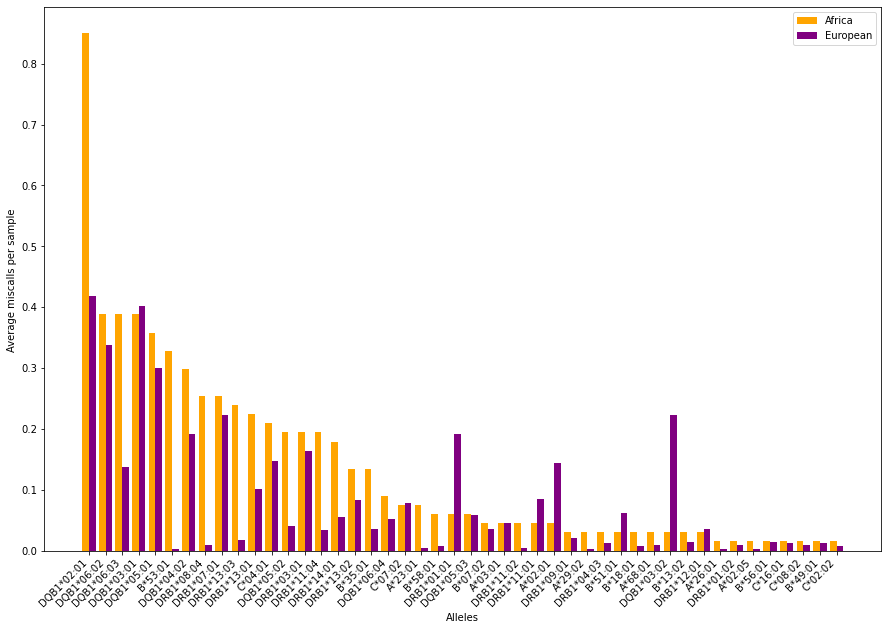

In [47]:
allele = np.array(df['allele'])
yoruba = np.array(df['yoruba'])
europe = np.array(df['Europe'])
total = np.array(df['total'])  

xaxis = np.arange(len(allele))
 
plt.figure(figsize = (15,10))

plt.bar(xaxis - 0.2, yoruba.astype(float), 0.4,color='orange')
plt.bar(xaxis + 0.2, europe.astype(float), 0.4, color='purple')
plt.legend(["Africa","European"])
plt.xticks(xaxis,allele,rotation=45, ha='right')
plt.xlabel("Alleles")
plt.ylabel("Average miscalls per sample ")

plt.show()

In [21]:
#yoruban: avg miscalls/sample
np.average(yoruba.astype(float))

0.1637126865671642

In [22]:
#european: avg miscalls/sample
np.average(europe.astype(float))

0.1069001182033097